## Theorem 0.0.2 (Approximate Caratheodory's Theorem)
In this worksheet we run through the proof of approximate Caratheodory, keeping an example to work with as we go. Please fill in code where indicated. Here is the theorem (slightly generalized) for reference:

**Theorem 0.0.2** (Generalized)**.** *Consider a set $T \subset \mathbb{R}^n$. Then, for every point $x \in \text{conv}(T)$ and every integer $k$, one can find points $x_1,\ldots,x_k \in T$ such that*
$$ \left\lVert x - \frac{1}{k}\sum_{j=1}^k x_j \right\rVert \leq \frac{\text{diam}(T)}{\sqrt k}$$

In [6]:
# Some useful imports
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import math

For the purposes of the code, let us fix a set $T \subset \mathbb R^n$ and an integer $k$ to work with.

In [31]:
# Choose a dimension to work in
n = 3

# Take some set of points with the points listed as np arrays of length n.
T = [np.zeros(3),np.zeros(3)] # TODO: write this!

# Pick a k, any k
k = 5


Let $m = |T|$.

In [32]:
m = 2 # TODO: Set m to the size of T (ideally, don't hard-code this in)

Our task is to find some $x \in \text{conv}(T)$ and express it as a convex combination of vectors in $T$. Recalling the definition of the convex hull, this amounts to finding an assignment of coefficients $\lambda_1, \ldots, \lambda_m$, so that $\lambda_1 + \cdots + \lambda_m = 1$ and $\lambda_1,\ldots,\lambda_m \geq 0$.

Below we present one way of doing this, but it would be nice to be able to sample more uniformly from $\text{conv}(T)$. See if you can improve it!

In [33]:
# Find random coefficients lambda_1,...,lambda_m as necessary.
# To recap, these satisfy:
# 1. lambda_1 + ... + lambda_m = 1
# 2. lambda_1, ... , lambda_m >= 0

coefficients = [0]*m # initialize list of coefficients
perm = np.random.permutation(m) # get a random permutation of 0,...,m-1
accum = 1.0
for i in perm[:-1]:
    # sample from viable range
    coefficients[i] = np.random.uniform(0,accum)
    accum = accum - coefficients[i]
coefficients[perm[-1]] = accum

coefficients

[0.01639505649315731, 0.9836049435068427]

We can now get $x \in \text{conv}(T)$ with $x = \lambda_1 z_1 + \cdots + \lambda_m z_m$ where $z_1, \ldots, z_m$ are the elements of $T$.

In [34]:
# Construct x
x = np.zeros(n) # TODO: Write this!

x

array([0., 0., 0.])

Now, we interpret the definition of convex combination probabilistically, with $\lambda_i$ taking the roles of probabilities. Specifically, we can define a random vector $Z$ that takes values $z_i$ with probabilities $\lambda_i$:
$$
\mathbb P \{Z = z_i\} = \lambda_i, \ \ \ i = 1, \ldots, m.
$$

In [35]:
# We can sample from the distribution of this random variable as follows:
Z_sample = rand.choices(T, weights = coefficients)
print(Z_sample)

[array([0., 0., 0.])]


Consider independent copies $Z_1, \ldots, Z_k$ of $Z$. Then we are interested in the random variable 
$$\left\lVert x - \frac{1}{k} \sum_{j=1}^k Z_j \right\rVert_2^2$$.

In [36]:
# Sample from the distribution of the random variable specified above, and return
# the sampled value along with the assignments to Z_1,...,Z_k
def sample_from_distribution():
    vectors = rand.choices(T, weights = coefficients, k = k)
    vec_sum = np.zeros(len(T[0]))
    for vec in vectors:
        vec_sum = vec_sum + vec
    distance = np.sum((x - vec_sum/k)**2)
    return distance, vectors

In the proof of the theorem it is shown that 
\begin{equation}
\mathbb E \left\lVert x - \frac{1}{k} \sum_{j=1}^k Z_j \right\rVert_2^2 \leq \frac{\text{diam}^2(T)}{k} \tag{1}
\end{equation}

Prove that this generalization to an arbitrary set is true.

We now find $\text{diam}(T)$. Recall $\text{diam}(T) = \sup_{x,y \in T} \lvert x - y \rvert $

In [37]:
# Compute diam(T)
diamT = 0 # TODO: Write this!

We can now verify inequality $(1)$ for our set $T$.

In [38]:
numSamples = 100000
samples = []

bestVal = float("inf")
best = None
for i in range(numSamples):
    sample, vectors = sample_from_distribution()
    if sample < bestVal:
        best = vectors
        bestVal = sample
    samples.append(sample)

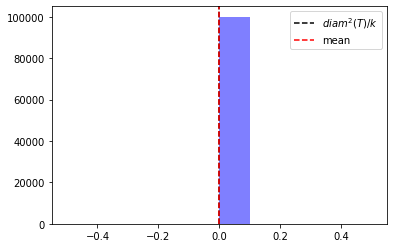

Best assignment (with value 0.0 ): 
[array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.])]


In [39]:
# plotting the example
num_bins = 10
plt.hist(samples, num_bins, facecolor='blue', alpha=0.5)
plt.axvline((diamT**2)/k, color='k', linestyle='dashed', linewidth=1.5, label = "$diam^2(T)/k$")
plt.axvline(np.mean(samples), color='r', linestyle='dashed', linewidth=1.5, label = "mean" )
plt.legend()
plt.show()
print("Best assignment (with value",bestVal, "): ")
print(best)